<a href="https://colab.research.google.com/github/Deepan3/Deepan/blob/main/BA_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#For Data Analysis
import pandas as pd
import numpy as np
from numpy import *

In [ ]:
#For date time functions
from datetime import datetime
from datetime import timedelta

In [ ]:
#For statistics 
import math
from scipy import sparse
import scipy.stats as ss

In [ ]:
#For Data visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#For Machine Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import sparse


In [ ]:
#For Debugging
import gc
import time
import warnings
import os

In [ ]:
#Performance check
from sklearn.metrics import mean_squared_error

Reading the data

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
features=pd.read_csv('/content/features.csv')
train['Type']='Train'
test['Type']='Test'

Train data
This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

Store - the store number Dept - the department number Date - the week Weekly_Sales - sales for the given department in the given store IsHoliday - whether the week is a special holiday week

In [ ]:
#Having a look at the data
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type
0,1,1,2010-02-05,24924.50,False,Train
1,1,1,2010-02-12,46039.49,True,Train
2,1,1,2010-02-19,41595.55,False,Train
3,1,1,2010-02-26,19403.54,False,Train
4,1,1,2010-03-05,21827.90,False,Train


In [ ]:
test.head()

,Store,Dept,Date,IsHoliday,Type
0,1,1,2012-11-02,False,Test
1,1,1,2012-11-09,False,Test
2,1,1,2012-11-16,False,Test
3,1,1,2012-11-23,True,Test
4,1,1,2012-11-30,False,Test


Features.csv
Store - the store number. Date - the week. Temperature - average temperature in the region. Fuel_Price - cost of fuel in the region. MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA. CPI - the consumer price index. Unemployment - the unemployment rate. IsHoliday - whether the week is a special holiday week.

In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Data Cleaning

In [ ]:
#Check for null values
train.isnull().any()

Store           False
Dept            False
Date            False
Weekly_Sales    False
IsHoliday       False
Type            False
dtype: bool

In [ ]:
test.isnull().any()

Store        False
Dept         False
Date         False
IsHoliday    False
Type         False
dtype: bool

In [ ]:
features.isnull().any()

Store           False
Date            False
Temperature     False
Fuel_Price      False
MarkDown1        True
MarkDown2        True
MarkDown3        True
MarkDown4        True
MarkDown5        True
CPI              True
Unemployment     True
IsHoliday       False
dtype: bool

There are null values present in the Markdown, CPI and Unemployment columns of the features data frame. Lets check howmany are there

In [ ]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Combining the train and test data. By doing this we will have enough data to perform Feature Engineering

In [ ]:
train.shape, test.shape, features.shape

((421570, 6), (115064, 5), (8190, 12))

In [ ]:
df=pd.concat([features,train,test],axis=0)

In [ ]:
df.shape

(544824, 15)

In [ ]:
df.head(8191)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,NaN,NaN,NaN
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,NaN,NaN,NaN
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,NaN,NaN,NaN
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,NaN,NaN,NaN
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,NaN,NaN,NaN
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,NaN,NaN,NaN
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,NaN,NaN,NaN
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,NaN,NaN,NaN


NaN for markdown means that there was no markdown event for that date. So we can replace that with 0 indicating no mark down

In [ ]:
#First we check whether what happens when we replace NA's with 0
df.fillna(0).head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,0.0,0.0,0
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,0.0,0.0,0
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,0.0,0.0,0
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,0.0,0.0,0
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,0.0,0.0,0


In [ ]:
#Removing rows with null values in all columns
df.dropna(axis=0, how="all", inplace=True)
#Removing all rows with null values in all rows
df.dropna(axis=1, how="all", inplace=True)

In [ ]:
df.shape

(544824, 15)

In [ ]:
#Fill missing values with 0
df_fill=df.fillna(0)

In [ ]:
df_fill.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,0.0,0.0,0
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,0.0,0.0,0
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,0.0,0.0,0
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,0.0,0.0,0
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,0.0,0.0,0


In [ ]:
df_fill.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Dept            0
Weekly_Sales    0
Type            0
dtype: int64

In [ ]:
df_fill.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales
count,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000
mean,22.220517,0.892265,0.051200,52.043454,18.143804,11.672103,20.936541,30.717216,2.407318,0.109252,43.611708,12365.863081
std,12.793920,7.576901,0.417807,999.040140,689.572588,929.208371,601.458362,1182.693075,20.770490,0.944640,30.772363,21066.981451
min,1.000000,-7.290000,0.000000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,0.000000,0.000000,0.000000,-4988.940000
25%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,25.377500
50%,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,3917.305000
75%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,15203.442500
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,99.000000,693099.360000


In [ ]:
df_Temp_mean=df.Temperature.fillna(df['Temperature'].mean())

In [ ]:
df_Unemployment_mean=df.Unemployment.fillna(df['Unemployment'].mean())

In [ ]:
df_Weekly_Sales_mean=df.Weekly_Sales.fillna(df['Weekly_Sales'].mean())

In [ ]:
df_fill['Weekly_Sales_mean']=df_Weekly_Sales_mean
df_fill['Unemployment_mean']=df_Unemployment_mean
df_fill['Temp_mean']=df_Temp_mean

In [ ]:
df_fill.describe()
#Statistics for Weekly Sales, Unemployment and Temperature confirm that we have done the missing values imputation with mean

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,Weekly_Sales_mean,Unemployment_mean,Temp_mean
count,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000
mean,22.220517,0.892265,0.051200,52.043454,18.143804,11.672103,20.936541,30.717216,2.407318,0.109252,43.611708,12365.863081,15981.258123,7.826821,59.356198
std,12.793920,7.576901,0.417807,999.040140,689.572588,929.208371,601.458362,1182.693075,20.770490,0.944640,30.772363,21066.981451,19977.741247,0.221777,2.289983
min,1.000000,-7.290000,0.000000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,0.000000,0.000000,0.000000,-4988.940000,-4988.940000,3.684000,-7.290000
25%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,25.377500,3330.647500,7.826821,59.356198
50%,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,3917.305000,13479.800000,7.826821,59.356198
75%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,15203.442500,15981.258123,7.826821,59.356198
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,99.000000,693099.360000,693099.360000,14.313000,101.950000


In [ ]:
df_fill.tail(50)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Weekly_Sales_mean,Unemployment_mean,Temp_mean
115014,45,2013-05-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,97.0,0.0,Test,15981.258123,7.826821,59.356198
115015,45,2013-05-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,97.0,0.0,Test,15981.258123,7.826821,59.356198
115016,45,2013-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,97.0,0.0,Test,15981.258123,7.826821,59.356198
115017,45,2013-06-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,97.0,0.0,Test,15981.258123,7.826821,59.356198
115018,45,2013-06-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,97.0,0.0,Test,15981.258123,7.826821,59.356198
115019,45,2013-06-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,97.0,0.0,Test,15981.258123,7.826821,59.356198
115020,45,2013-06-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,97.0,0.0,Test,15981.258123,7.826821,59.356198
115021,45,2013-07-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,97.0,0.0,Test,15981.258123,7.826821,59.356198
115022,45,2013-07-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,97.0,0.0,Test,15981.258123,7.826821,59.356198
115023,45,2013-07-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,97.0,0.0,Test,15981.258123,7.826821,59.356198


Data Visualization



Weekly Sales by Department (1-99)

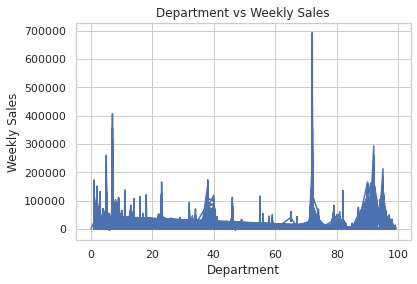

In [ ]:
import matplotlib.pyplot as plt
#Weekly sales by Department
x=df_fill['Dept']
y=df_fill['Weekly_Sales']
plt.title("Department vs Weekly Sales")
plt.xlabel("Department")
plt.ylabel("Weekly Sales")
plt.plot(x,y)
plt.show()

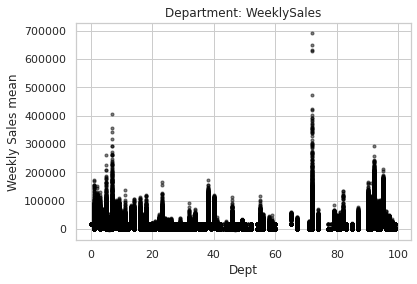

In [ ]:
#Imputed Weekly Sales by Department
x= df_fill['Dept'].values
y= df_fill['Weekly_Sales_mean'].values
colors = (0,0,0)
area= np.pi*3
plt.scatter(x,y,s=area,c=colors,alpha=0.5)
plt.title("Department: WeeklySales")
plt.xlabel('Dept')
plt.ylabel('Weekly Sales mean')
plt.show()

Weekly sales by Store (1-45)

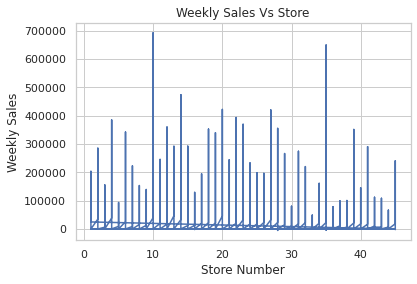

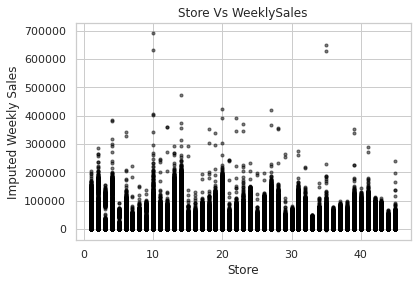

In [ ]:
x=df_fill['Store']
y=df_fill['Weekly_Sales']
plt.title('Weekly Sales Vs Store')
plt.xlabel('Store Number')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()


x=df_fill['Store'].values   #.values command makes an array
y=df_fill['Weekly_Sales_mean'].values
plt.scatter(x,y,s=np.pi*3,c=(0,0,0),alpha=0.5)
plt.title("Store Vs WeeklySales")
plt.xlabel('Store')
plt.ylabel('Imputed Weekly Sales')
plt.show()

Weekly Sales by Date



Lets first make the year and week columns for a better understanding of sales

In [ ]:
df_fill.Date=pd.to_datetime(df_fill.Date)
df_fill['Year']=df_fill.Date.dt.year
df_fill['Week']=df_fill.Date.dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_fill['Month']=df_fill.Date.dt.month

In [ ]:
df_fill.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,IsHoliday,Dept,Weekly_Sales,Type,Weekly_Sales_mean,Unemployment_mean,Temp_mean,Year,Week,Month
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,False,0.0,0.0,0,15981.258123,8.106,42.31,2010,5,2
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,...,True,0.0,0.0,0,15981.258123,8.106,38.51,2010,6,2
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,...,False,0.0,0.0,0,15981.258123,8.106,39.93,2010,7,2
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,...,False,0.0,0.0,0,15981.258123,8.106,46.63,2010,8,2
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,...,False,0.0,0.0,0,15981.258123,8.106,46.50,2010,9,3


Yearwise, Monthwise and week-wise sales

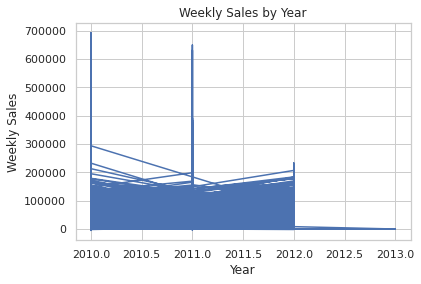

In [ ]:
x=df_fill['Year']
y=df_fill['Weekly_Sales']
plt.title('Weekly Sales by Year')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()

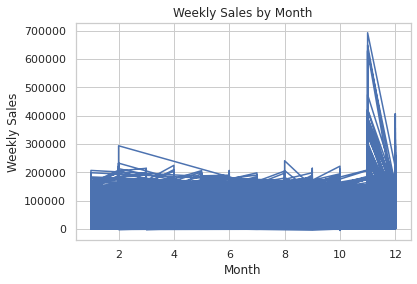

In [ ]:
x=df_fill['Month']
y=df_fill['Weekly_Sales']
plt.title('Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()

There is a clear depiction of shoot in sales for holidays like thanksgiving, christmas and new year

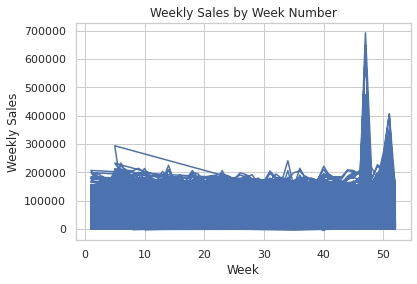

In [ ]:
x=df_fill['Week']
y=df_fill['Weekly_Sales']
plt.title('Weekly Sales by Week Number')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()

Let's now analyse sales when there is a holiday versus when there is not

In [ ]:
#Lets check how many Holidays are there
df_fill['IsHoliday'].value_counts()

False    505650
True      39174
Name: IsHoliday, dtype: int64

In [ ]:
#Converting true or false to 0 and 1
df_fill['IsHoliday01'] = df_fill['IsHoliday'].apply(lambda x: '1' if x == True else '0')

In [ ]:
df_fill.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Dept,Weekly_Sales,Type,Weekly_Sales_mean,Unemployment_mean,Temp_mean,Year,Week,Month,IsHoliday01
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,0.0,0.0,0,15981.258123,8.106,42.31,2010,5,2,0
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,...,0.0,0.0,0,15981.258123,8.106,38.51,2010,6,2,1
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,...,0.0,0.0,0,15981.258123,8.106,39.93,2010,7,2,0
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,...,0.0,0.0,0,15981.258123,8.106,46.63,2010,8,2,0
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,...,0.0,0.0,0,15981.258123,8.106,46.50,2010,9,3,0


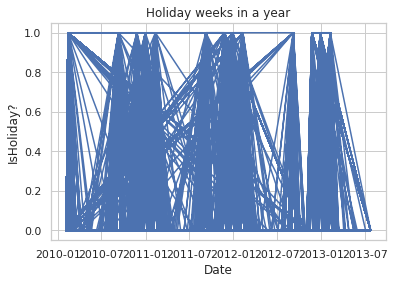

In [ ]:
x=df_fill['Date']
y=df_fill['IsHoliday']
plt.title('Holiday weeks in a year')
plt.xlabel('Date')
plt.ylabel('IsHoliday?')
plt.plot(x,y)
plt.show()

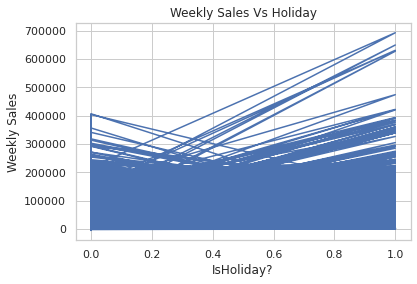

In [ ]:
x=df_fill['IsHoliday']
y=df_fill['Weekly_Sales']
plt.title('Weekly Sales Vs Holiday')
plt.xlabel('IsHoliday?')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()

Visualizing the effect of markdown events on the weekly sales

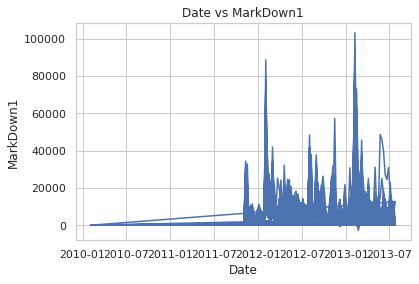

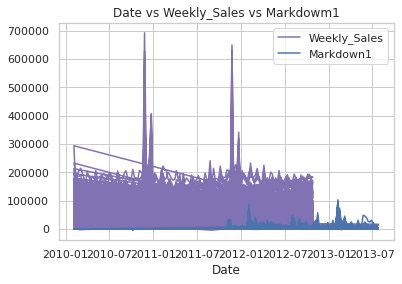

In [ ]:
y1=df_fill['MarkDown1']
x=df_fill['Date']
plt.title("Date vs MarkDown1")
plt.xlabel("Date")
plt.ylabel("MarkDown1")
plt.plot(x,y1)
plt.show()

y1=df_fill['MarkDown1']
y2=df_fill['Weekly_Sales_mean']
x=df_fill['Date']
plt.plot(x,y2,c='m',label='Weekly_Sales')
plt.plot(x,y1,c='b',label='Markdown1')
plt.title("Date vs Weekly_Sales vs Markdowm1")
plt.xlabel("Date")
plt.legend()
plt.show()

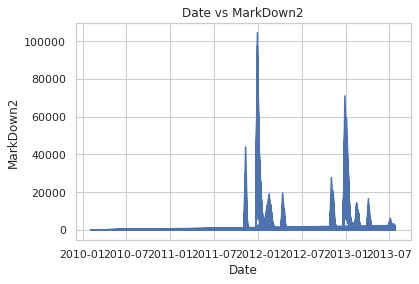

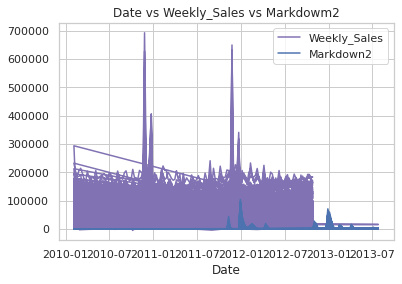

In [ ]:
y1=df_fill['MarkDown2']
x=df_fill['Date']
plt.title("Date vs MarkDown2")
plt.xlabel("Date")
plt.ylabel("MarkDown2")
plt.plot(x,y1)
plt.show()

y1=df_fill['MarkDown2']
y2=df_fill['Weekly_Sales_mean']
x=df_fill['Date']
plt.plot(x,y2,c='m',label='Weekly_Sales')
plt.plot(x,y1,c='b',label='Markdown2')
plt.title("Date vs Weekly_Sales vs Markdowm2")
plt.xlabel("Date")
plt.legend()
plt.show()

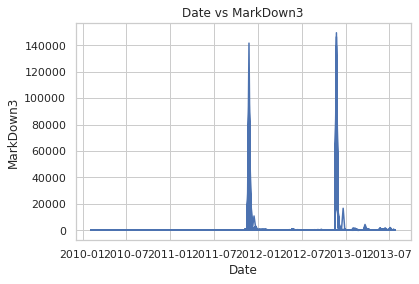

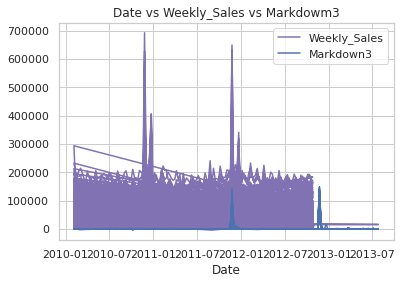

In [ ]:
y1=df_fill['MarkDown3']
x=df_fill['Date']
plt.title("Date vs MarkDown3")
plt.xlabel("Date")
plt.ylabel("MarkDown3")
plt.plot(x,y1)
plt.show()

y1=df_fill['MarkDown3']
y2=df_fill['Weekly_Sales_mean']
x=df_fill['Date']
plt.plot(x,y2,c='m',label='Weekly_Sales')
plt.plot(x,y1,c='b',label='Markdown3')
plt.title("Date vs Weekly_Sales vs Markdowm3")
plt.xlabel("Date")
plt.legend()
plt.show()


Markdown 3 seems to be very effective as compared to other markdown events

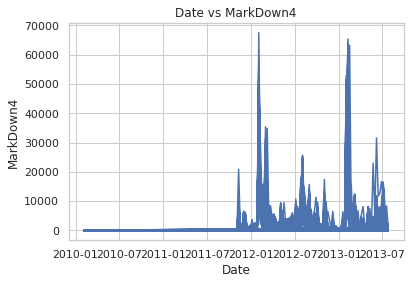

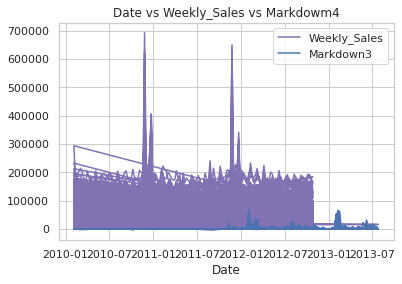

In [ ]:
y1=df_fill['MarkDown4']
x=df_fill['Date']
plt.title("Date vs MarkDown4")
plt.xlabel("Date")
plt.ylabel("MarkDown4")
plt.plot(x,y1)
plt.show()

y1=df_fill['MarkDown4']
y2=df_fill['Weekly_Sales_mean']
x=df_fill['Date']
plt.plot(x,y2,c='m',label='Weekly_Sales')
plt.plot(x,y1,c='b',label='Markdown3')
plt.title("Date vs Weekly_Sales vs Markdowm4")
plt.xlabel("Date")
plt.legend()
plt.show()

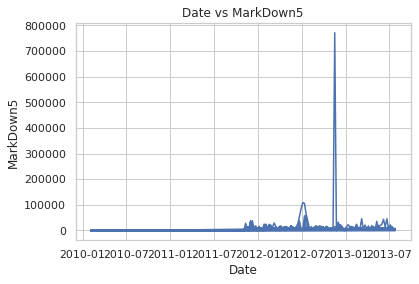

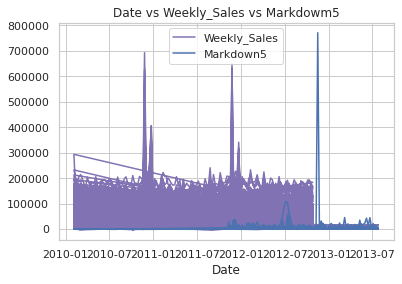

In [ ]:
y1=df_fill['MarkDown5']
x=df_fill['Date']
plt.title("Date vs MarkDown5")
plt.xlabel("Date")
plt.ylabel("MarkDown5")
plt.plot(x,y1)
plt.show()


y1=df_fill['MarkDown5']
y2=df_fill['Weekly_Sales_mean']
x=df_fill['Date']
plt.plot(x,y2,c='m',label='Weekly_Sales')
plt.plot(x,y1,c='b',label='Markdown5')
plt.title("Date vs Weekly_Sales vs Markdowm5")
plt.xlabel("Date")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


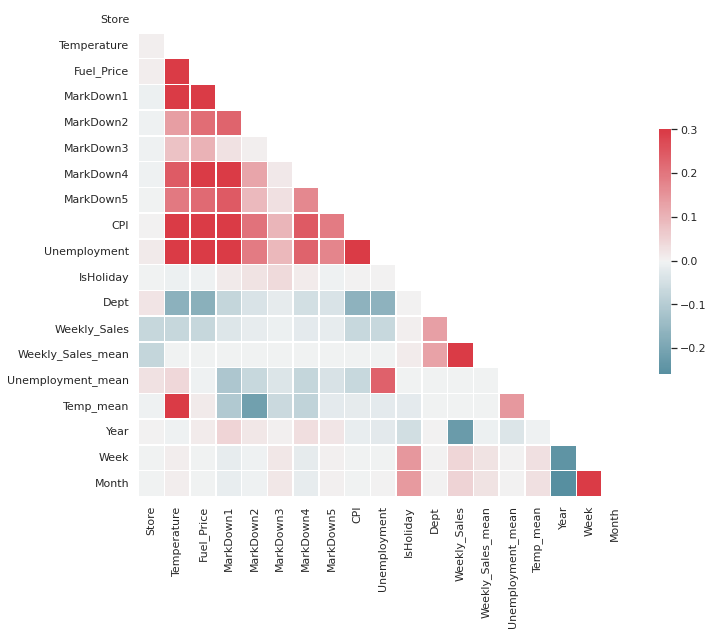

In [ ]:
#Computing the correlation matrix to identify the relations between the variables
sns.set(style="white")

corr = df_fill.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Department - Weekly sales are more for the higher departments.


Fuel price - If the Fuel Price in the area is cheap, more customers will travel to the Store for shopping, But still, that has a very less correlation


CPI - If there is inflation, Cost of goods will rise which causes CPI to increase. This will cause a reduction in sales. It's obvious. But again, This doesn't have much correlation.


For a lesser store number, the weekly sales are higher.
Unemployment, Temperature is less? Sales are higher. (Not much correlation)
HOLIDAY SEASON SALES


Let's have a look at Outliers, Are they during holidays?
If yes than Ok. If no then they're false values

In [ ]:
df_fill.loc[df_fill['Weekly_Sales_mean'] >300000]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Dept,Weekly_Sales,Type,Weekly_Sales_mean,Unemployment_mean,Temp_mean,Year,Week,Month,IsHoliday01
30474,4,2011-12-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,318422.01,Train,318422.01,7.826821,59.356198,2011,51,12,0
37201,4,2010-11-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,381072.11,Train,381072.11,7.826821,59.356198,2010,47,11,1
37253,4,2011-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,385051.04,Train,385051.04,7.826821,59.356198,2011,47,11,1
56417,6,2010-11-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,342578.65,Train,342578.65,7.826821,59.356198,2010,47,11,1
56469,6,2011-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,326866.60,Train,326866.60,7.826821,59.356198,2011,47,11,1
88428,10,2010-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,406988.63,Train,406988.63,7.826821,59.356198,2010,51,12,0
88480,10,2011-12-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,341308.00,Train,341308.00,7.826821,59.356198,2011,51,12,0
95373,10,2010-11-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,693099.36,Train,693099.36,7.826821,59.356198,2010,47,11,1
95377,10,2010-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,404245.03,Train,404245.03,7.826821,59.356198,2010,51,12,0
95425,10,2011-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,630999.19,Train,630999.19,7.826821,59.356198,2011,47,11,1


In [ ]:
#Examining the dates when the sales shoot up
df_fill.loc[df_fill['Weekly_Sales_mean'] >240000,"Date"].value_counts()

2010-11-26    23
2011-11-25    22
2010-12-24    14
2011-12-23     9
2010-12-17     2
2010-02-05     1
2011-08-26     1
Name: Date, dtype: int64

It seems that Holiday seasons affect the Walmart sales alot. So we create the necessary dummy variables to easily compare the categorical data with the numerical data

In [ ]:
df_fill = df_fill.assign(md1_present = df_fill.MarkDown1.notnull())
df_fill = df_fill.assign(md2_present = df_fill.MarkDown2.notnull())
df_fill = df_fill.assign(md3_present = df_fill.MarkDown3.notnull())
df_fill = df_fill.assign(md4_present = df_fill.MarkDown4.notnull())
df_fill = df_fill.assign(md5_present = df_fill.MarkDown5.notnull())

In [ ]:
df_fill['Store']='Store_' + df_fill['Store'].map(str)
df_fill['Dept']='Dept_' + df_fill['Dept'].map(str)
df_fill['IsHoliday']='IsHoliday_' + df_fill['IsHoliday'].map(str)
df_fill.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Temp_mean,Year,Week,Month,IsHoliday01,md1_present,md2_present,md3_present,md4_present,md5_present
0,Store_1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,42.31,2010,5,2,0,True,True,True,True,True
1,Store_1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,...,38.51,2010,6,2,1,True,True,True,True,True
2,Store_1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,...,39.93,2010,7,2,0,True,True,True,True,True
3,Store_1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,...,46.63,2010,8,2,0,True,True,True,True,True
4,Store_1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,...,46.50,2010,9,3,0,True,True,True,True,True


In [ ]:
#Creating dummy variables now for store, department and holiday
store_dummies = pd.get_dummies(df_fill['Store'])
dept_dummies = pd.get_dummies(df_fill['Dept'])
holiday_dummies = pd.get_dummies(df_fill['IsHoliday'])

In [ ]:
#Month also has a nice correlation so creating a dummy variable for month
df_fill['Month'] = 'Month_' + df_fill['Month'].map(str)

In [ ]:
Month_dummies = pd.get_dummies(df_fill['Month'] )

In [ ]:
df_fill['Black_Friday']=np.where((df_fill['Date']==datetime(2010, 11, 26).date()) | (df_fill['Date']==datetime(2011,11,25).date()), 'yes', 'no')
print((len(df_fill.loc[df_fill['Black_Friday'] == 'yes'])/len(df_fill))*100," % of rows are Black Friday")

0.0  % of rows are Black Friday


In [ ]:
df_fill['Pre_christmas']=np.where((df_fill['Date']==datetime(2010, 12, 23).date()) | (df_fill['Date']==datetime(2010,12,24).date()) | (df_fill['Date']==datetime(2011, 12, 23).date()) | (df_fill['Date']==datetime(2011,12,24).date()), 'yes', 'no')
print((len(df_fill.loc[df_fill['Pre_christmas'] == 'yes'])/len(df_fill))*100," % of rows are Pre Christmas")

0.0  % of rows are Pre Christmas


In [ ]:
#Creating dummies for Black friday and pre christmas
df_fill['Black_Friday'] = 'Black_Friday_' + df_fill['Black_Friday'].map(str)
df_fill['Pre_christmas'] = 'Pre_christmas_' + df_fill['Pre_christmas'].map(str)
Black_Friday_dummies = pd.get_dummies(df_fill['Black_Friday'] )
Pre_christmas_dummies = pd.get_dummies(df_fill['Pre_christmas'] )

In [ ]:
df_fill.head(1000)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Week,Month,IsHoliday01,md1_present,md2_present,md3_present,md4_present,md5_present,Black_Friday,Pre_christmas
0,Store_1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,5,Month_2,0,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
1,Store_1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,...,6,Month_2,1,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
2,Store_1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,...,7,Month_2,0,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
3,Store_1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,...,8,Month_2,0,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
4,Store_1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,...,9,Month_3,0,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Store_6,2011-09-23,78.49,3.467,0.0,0.0,0.0,0.0,0.0,217.918847,...,38,Month_9,0,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
996,Store_6,2011-09-30,82.51,3.355,0.0,0.0,0.0,0.0,0.0,218.257944,...,39,Month_9,0,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
997,Store_6,2011-10-07,74.10,3.285,0.0,0.0,0.0,0.0,0.0,218.597040,...,40,Month_10,0,True,True,True,True,True,Black_Friday_no,Pre_christmas_no
998,Store_6,2011-10-14,71.24,3.274,0.0,0.0,0.0,0.0,0.0,218.910984,...,41,Month_10,0,True,True,True,True,True,Black_Friday_no,Pre_christmas_no


In [ ]:
#Creating dummies for the month
df_fill['Month_Year'] = [date.month for date in df_fill['Date']]
df_fill['Month_Year'] = df_fill['Month_Year'].map(str)
Month_dummies = pd.get_dummies(df_fill['Month_Year'] )

In [ ]:
Month_dummies.head()

,1,10,11,12,2,3,4,5,6,7,8,9
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Add dummies to the data frame now
df_fill = pd.concat([df_fill,holiday_dummies,Pre_christmas_dummies,Black_Friday_dummies],axis=1)


Creating a data frame with average per store and department

In [ ]:
medians = pd.DataFrame({'Median Sales' :df_fill.loc[df_fill['Type']=='Train'].groupby(by=['Dept','Store','Month','IsHoliday'])['Weekly_Sales'].median()})

In [ ]:
medians.head(10)

Median Sales
Dept     Store   Month    IsHoliday                    
Dept_1.0 Store_1 Month_1  IsHoliday_False     17350.585
                 Month_10 IsHoliday_False     23388.030
                 Month_11 IsHoliday_False     19551.115
                          IsHoliday_True      19865.770
                 Month_12 IsHoliday_False     39109.390
                          IsHoliday_True      21237.730
                 Month_2  IsHoliday_False     23510.490
                          IsHoliday_True      37887.170
                 Month_3  IsHoliday_False     21280.400
                 Month_4  IsHoliday_False     26318.080

In [ ]:
#Merge this data frame to the main data frame
df_fill = df_fill.merge(medians, how = 'outer', on = ['Dept','Store','Month','IsHoliday'])

In [ ]:
df_fill.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,md4_present,md5_present,Black_Friday,Pre_christmas,Month_Year,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Black_Friday_no,Median Sales
0,Store_1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,True,True,Black_Friday_no,Pre_christmas_no,2,1,0,1,1,NaN
1,Store_1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,...,True,True,Black_Friday_no,Pre_christmas_no,2,1,0,1,1,NaN
2,Store_1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,...,True,True,Black_Friday_no,Pre_christmas_no,2,1,0,1,1,NaN
3,Store_1,2011-02-04,42.27,2.989,0.0,0.0,0.0,0.0,0.0,212.566881,...,True,True,Black_Friday_no,Pre_christmas_no,2,1,0,1,1,NaN
4,Store_1,2011-02-18,57.36,3.045,0.0,0.0,0.0,0.0,0.0,213.247885,...,True,True,Black_Friday_no,Pre_christmas_no,2,1,0,1,1,NaN


In [ ]:
#There are NA's
df_fill['Median Sales'].fillna(df_fill['Median Sales'].loc[df_fill['Type']=='Train'].median(), inplace=True)

In [ ]:
#Creating a key to easily access each row
df_fill['Key'] = df_fill['Dept'].map(str)+df_fill['Store'].map(str)+df_fill['Date'].map(str)+df_fill['IsHoliday'].map(str)

In [ ]:
list(df_fill)

['Store',
 'Date',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'IsHoliday',
 'Dept',
 'Weekly_Sales',
 'Type',
 'Weekly_Sales_mean',
 'Unemployment_mean',
 'Temp_mean',
 'Year',
 'Week',
 'Month',
 'IsHoliday01',
 'md1_present',
 'md2_present',
 'md3_present',
 'md4_present',
 'md5_present',
 'Black_Friday',
 'Pre_christmas',
 'Month_Year',
 'IsHoliday_False',
 'IsHoliday_True',
 'Pre_christmas_no',
 'Black_Friday_no',
 'Median Sales',
 'Key']

In [ ]:
#Attach variable of last week
df_fill['DateLagged'] = df_fill['Date']- timedelta(days=7)
df_fill.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Black_Friday,Pre_christmas,Month_Year,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Black_Friday_no,Median Sales,Key,DateLagged
0,Store_1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,1,7563.04,Dept_0.0Store_12010-02-05 00:00:00IsHoliday_False,2010-01-29
1,Store_1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,1,7563.04,Dept_0.0Store_12010-02-19 00:00:00IsHoliday_False,2010-02-12
2,Store_1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,1,7563.04,Dept_0.0Store_12010-02-26 00:00:00IsHoliday_False,2010-02-19
3,Store_1,2011-02-04,42.27,2.989,0.0,0.0,0.0,0.0,0.0,212.566881,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,1,7563.04,Dept_0.0Store_12011-02-04 00:00:00IsHoliday_False,2011-01-28
4,Store_1,2011-02-18,57.36,3.045,0.0,0.0,0.0,0.0,0.0,213.247885,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,1,7563.04,Dept_0.0Store_12011-02-18 00:00:00IsHoliday_False,2011-02-11


In [ ]:
#Next, we create a sorted dataframe.
# Make a sorted dataframe. This will allow us to find lagged variables much faster!
sorted_df = df_fill.sort_values(['Store', 'Dept','Date'], ascending=[1, 1,1])
sorted_df = sorted_df.reset_index(drop=True) # Reinitialize the row indices for the loop to work

In [ ]:
sorted_df['LaggedSales'] = np.nan # Initialize column
sorted_df['LaggedAvailable'] = np.nan # Initialize column
last=df_fill.loc[0] # intialize last row for first iteration. Doesn't really matter what it is
row_len = sorted_df.shape[0]

In [ ]:
sorted_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Month_Year,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Black_Friday_no,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable
0,Store_1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,2,1,0,1,1,7563.04,Dept_0.0Store_12010-02-05 00:00:00IsHoliday_False,2010-01-29,NaN,NaN
1,Store_1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,...,2,0,1,1,1,7563.04,Dept_0.0Store_12010-02-12 00:00:00IsHoliday_True,2010-02-05,NaN,NaN
2,Store_1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,...,2,1,0,1,1,7563.04,Dept_0.0Store_12010-02-19 00:00:00IsHoliday_False,2010-02-12,NaN,NaN
3,Store_1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,...,2,1,0,1,1,7563.04,Dept_0.0Store_12010-02-26 00:00:00IsHoliday_False,2010-02-19,NaN,NaN
4,Store_1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,...,3,1,0,1,1,7563.04,Dept_0.0Store_12010-03-05 00:00:00IsHoliday_False,2010-02-26,NaN,NaN


In [ ]:
#Merge the tables by each store and department
df_fill = df_fill.merge(sorted_df[['Dept', 'Store','Date','LaggedSales','LaggedAvailable']], how = 'inner', on = ['Dept', 'Store','Date'])
df_fill.head(25)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Month_Year,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Black_Friday_no,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable
0,Store_1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,...,2,1,0,1,1,7563.04,Dept_0.0Store_12010-02-05 00:00:00IsHoliday_False,2010-01-29,NaN,NaN
1,Store_1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,...,2,1,0,1,1,7563.04,Dept_0.0Store_12010-02-19 00:00:00IsHoliday_False,2010-02-12,NaN,NaN
2,Store_1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,...,2,1,0,1,1,7563.04,Dept_0.0Store_12010-02-26 00:00:00IsHoliday_False,2010-02-19,NaN,NaN
3,Store_1,2011-02-04,42.27,2.989,0.00,0.00,0.00,0.00,0.00,212.566881,...,2,1,0,1,1,7563.04,Dept_0.0Store_12011-02-04 00:00:00IsHoliday_False,2011-01-28,NaN,NaN
4,Store_1,2011-02-18,57.36,3.045,0.00,0.00,0.00,0.00,0.00,213.247885,...,2,1,0,1,1,7563.04,Dept_0.0Store_12011-02-18 00:00:00IsHoliday_False,2011-02-11,NaN,NaN
5,Store_1,2011-02-25,62.90,3.065,0.00,0.00,0.00,0.00,0.00,213.535609,...,2,1,0,1,1,7563.04,Dept_0.0Store_12011-02-25 00:00:00IsHoliday_False,2011-02-18,NaN,NaN
6,Store_1,2012-02-03,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,...,2,1,0,1,1,7563.04,Dept_0.0Store_12012-02-03 00:00:00IsHoliday_False,2012-01-27,NaN,NaN
7,Store_1,2012-02-17,45.32,3.510,9873.33,11062.27,9.80,8409.31,3402.66,220.425759,...,2,1,0,1,1,7563.04,Dept_0.0Store_12012-02-17 00:00:00IsHoliday_False,2012-02-10,NaN,NaN
8,Store_1,2012-02-24,57.25,3.555,9349.61,7556.01,3.20,1219.92,8143.59,220.636902,...,2,1,0,1,1,7563.04,Dept_0.0Store_12012-02-24 00:00:00IsHoliday_False,2012-02-17,NaN,NaN
9,Store_1,2013-02-01,56.46,3.244,9290.91,1359.90,265.00,20657.82,972.61,224.235290,...,2,1,0,1,1,7563.04,Dept_0.0Store_12013-02-01 00:00:00IsHoliday_False,2013-01-25,NaN,NaN


In [ ]:
df_fill['Sales_dif'] = df_fill['Median Sales'] - df_fill['LaggedSales']

In [ ]:
switch= 1

if(switch):
    df_backup = df_fill
else:
    df_fill=df_backup
    display(df_backup.head())

In [ ]:
df_fill['Difference'] = df_fill['Median Sales'] - df_fill['Weekly_Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


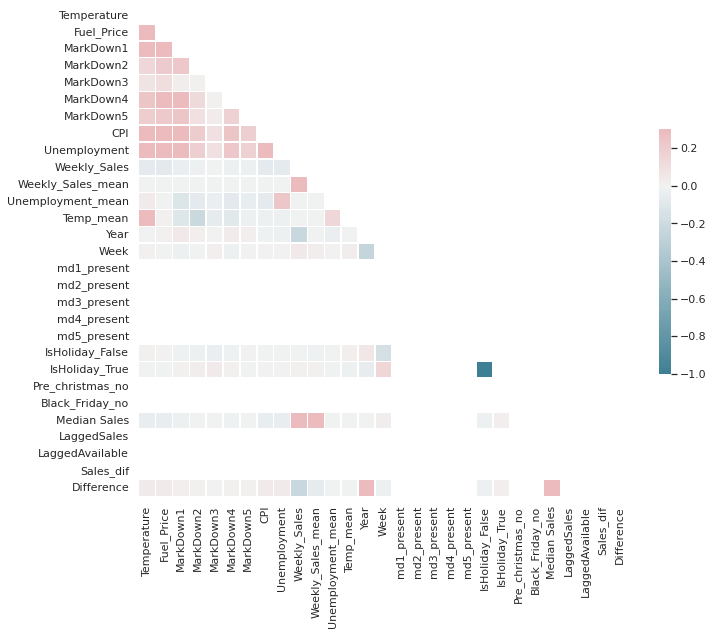

In [ ]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_fill.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#Using the important variables we will require to build the model
selector = ['CPI','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Temperature','Unemployment','md1_present','md2_present','md3_present','md4_present','md5_present','IsHoliday_False','IsHoliday_True','Pre_christmas_no','Pre_christmas_yes','Black_Friday_no','Black_Friday_yes','LaggedSales','Sales_dif','LaggedAvailable']
df_fill[selector].describe()

KeyError: ignored

In [ ]:
#Train-Test split
train=df_fill.loc[df_fill['Type']=='Train']
test=df_fill.loc[df_fill['Type']=='Test']

In [ ]:
test.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,IsHoliday_True,Pre_christmas_no,Black_Friday_no,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
8199,Store_1,2013-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,23510.49,Dept_1.0Store_12013-02-01 00:00:00IsHoliday_False,2013-01-25,NaN,NaN,NaN,23510.49
8200,Store_1,2013-02-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,23510.49,Dept_1.0Store_12013-02-15 00:00:00IsHoliday_False,2013-02-08,NaN,NaN,NaN,23510.49
8201,Store_1,2013-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,23510.49,Dept_1.0Store_12013-02-22 00:00:00IsHoliday_False,2013-02-15,NaN,NaN,NaN,23510.49
8205,Store_1,2013-02-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,37887.17,Dept_1.0Store_12013-02-08 00:00:00IsHoliday_True,2013-02-01,NaN,NaN,NaN,37887.17
8219,Store_1,2013-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,21280.40,Dept_1.0Store_12013-03-01 00:00:00IsHoliday_False,2013-02-22,NaN,NaN,NaN,21280.40
